# Test-iris 

## 回归模型方法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.preprocessing as pre

In [2]:
# 记得写一句 header=None 否则后面命名列名，可能会吞掉
iris_df = pd.read_csv('../dataset/iris/iris.data',header=None)
iris_df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X,y = iris_df.iloc[:, :-1], iris_df.iloc[:, -1]

In [126]:
#X.head()
#y.head()

In [4]:
# 转化为numpy array
X, y = np.array(X), np.array(y)
class_set = set(y)
# type(class_set) set
print(class_set)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}


In [5]:
y.size

150

In [6]:
# 转化为list
class_list = list(class_set)

In [7]:
sort_list = sorted(class_list)

In [8]:
# 由于y属于文字标签，应该将它映射到整数作为标签
for idx, class_name in enumerate(sort_list):
    y[y == class_name] = idx

In [9]:
for idx, class_name in enumerate(sorted(list(set(y)))):
 y[y == class_name] = idx

In [11]:
# 标准化标签
y = pre.LabelEncoder().fit_transform(iris_df.iloc[:, -1])
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
X.shape,y.shape

((150, 4), (150,))

---
上面这个输出的时候莫名其妙会丢失掉一个参数
发现错误，为一开始没有注意命名`iris_df`

In [142]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [143]:
X.shape, y.shape

((150, 4), (150,))

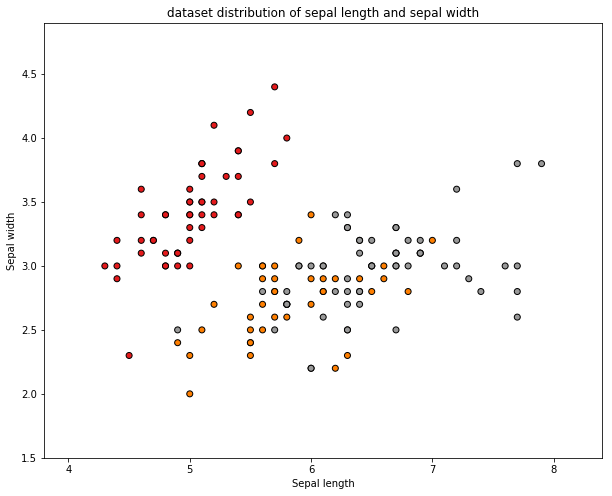

In [16]:
show_data_in_2d(X, y)

> 相当于用前面100组数据，因为其正好是两种类别，来进行回归模型的学习

In [17]:
X_100, y_100 = X[:100], y[:100];

In [18]:
X_100.shape, y_100.shape

((100, 4), (100,))

### Create train_test_split for binary classification

[sklearn.model_selection.train_test_split文档](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- test_size
test_size=0.3 取数据集其中的 0.3 作为测试
- random_state
[对random_state参数的理解](https://www.cnblogs.com/xianhan/p/10644873.html)
随机拆分数据集

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_100, y_100, test_size=0.3, random_state=42)

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70, 4), (70,), (30, 4), (30,))

- 进行feature normalization与zero-centered

In [41]:
f_mean, f_std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train = (X_train - f_mean) / f_std
X_test = (X_test - f_mean) / f_std

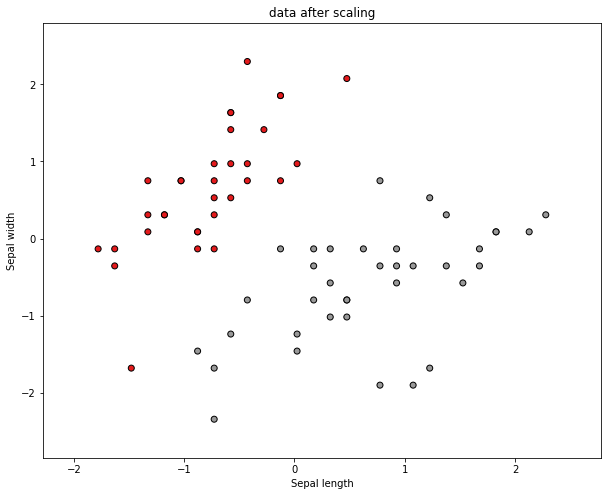

In [42]:
show_data_in_2d(X_train, y_train, title='data after scaling')

- Initialze the classifier weight 初始化权重

In [43]:
# 胜场参数向量
theta = np.zeros((X_train.shape[1] + 1))

In [44]:
print(theta.size)
print(theta)

5
[ 0.  0.  0.  0.  0.]


In [45]:
# Concatenate X with a new dimension for bias
# 多加一层，bias
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

In [46]:
X_train.shape, X_test.shape

((70, 5), (30, 5))

### 前向传播，计算分类器输出，交叉熵

- compute $y_{\theta}(x)$ $$ y_{\theta}(x)=\frac{1}{1+e^{-\theta^T x}} $$

- compute $J(\theta)$
$$ J(\theta)=\frac{1}{m}\sum_{i=1}^{m}Cost(y_{\theta}(x^{(i)}),t^{(i)}) $$

- compute $Cost(y_{\theta}, t)$ (cross entropy)
$$ Cost(y_{\theta}, t)=-t log((y_{\theta}(x))-(1-t)log(1-(y_{\theta}(x))) $$

In [47]:
# 计算输出结果 w^T X 矩阵乘积
logits = np.dot(X_train, theta)
logits.shape

(70,)

- 激活值 $ h $

In [48]:
h = 1 / (1 + np.exp(-logits))

- 总体误差 $ Cost(y_{\theta},t) $

In [49]:
# 交叉熵公式，相当于二分法的方法
cross_entropy_loss = (-y_train * np.log(h) - (1 - y_train) * np.log(1 - h)).mean()

In [50]:
# 当前误差
cross_entropy_loss

0.6931471805599454

### 前向传播，计算参数与分类器更新

- 计算梯度

$$ \Delta = \frac{(y - h)X}{N_y} $$

In [51]:
gradient = np.dot((h - y_train), X_train) / y.size
print(gradient)

[-0.01333333 -0.17008346  0.15038707 -0.22560206 -0.22367982]


- 更新权重

$$ \theta = \theta - lr * \Delta $$

In [52]:
lr = 0.01
theta = theta - 0.01 * gradient
print(theta)

[ 0.00013333  0.00170083 -0.00150387  0.00225602  0.0022368 ]


In [53]:
np.random.seed(21)
theta = np.random.rand(*theta.shape)
print(theta)

[ 0.04872488  0.28910966  0.72096635  0.02161625  0.20592277]


In [57]:
# 使用循环进行书写
num_epoch = 1000
for epoch in range(num_epoch):
    # forward pass
    logits = np.dot(X_train, theta)
    h = 1 / (1 + np.exp(-logits))
    cross_entropy_loss = (-y_train * np.log(h) - (1 - y_train) * np.log(1 - h)).mean()

    # backward pass
    gradient = np.dot((h - y_train), X_train) / y.size
    theta = theta - 0.01 * gradient

    if epoch % 50 == 0:
        print('Epoch', epoch, 'loss:', cross_entropy_loss)

Epoch 0 loss: 0.106497001371
Epoch 50 loss: 0.101774446754
Epoch 100 loss: 0.0974516881847
Epoch 150 loss: 0.093480724249
Epoch 200 loss: 0.0898208498636
Epoch 250 loss: 0.0864373352049
Epoch 300 loss: 0.0833003789001
Epoch 350 loss: 0.0803842718753
Epoch 400 loss: 0.077666724424
Epoch 450 loss: 0.0751283207866
Epoch 500 loss: 0.0727520741225
Epoch 550 loss: 0.0705230611076
Epoch 600 loss: 0.0684281201243
Epoch 650 loss: 0.0664556005771
Epoch 700 loss: 0.0645951535655
Epoch 750 loss: 0.062837556212
Epoch 800 loss: 0.0611745635308
Epoch 850 loss: 0.0595987829534
Epoch 900 loss: 0.0581035675889
Epoch 950 loss: 0.0566829250501


- test

In [58]:
h_test = 1 / (1 + np.exp(-np.dot(X_test, theta)))
# 输出模型在测试集的标签值
print(h_test)

[ 0.99171974  0.95554756  0.98719675  0.05281392  0.05852662  0.04233217
  0.0130585   0.91210721  0.04349017  0.03532635  0.07902327  0.04444514
  0.97225875  0.02667885  0.94409599  0.02833961  0.99279797  0.99567526
  0.03397305  0.09091001  0.95910356  0.92426936  0.0631253   0.02006634
  0.91894909  0.0457372   0.0364629   0.9431345   0.03700089  0.99310848]


In [59]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [60]:
((h_test > 0.5) == y_test).sum() / y_test.size

1.0

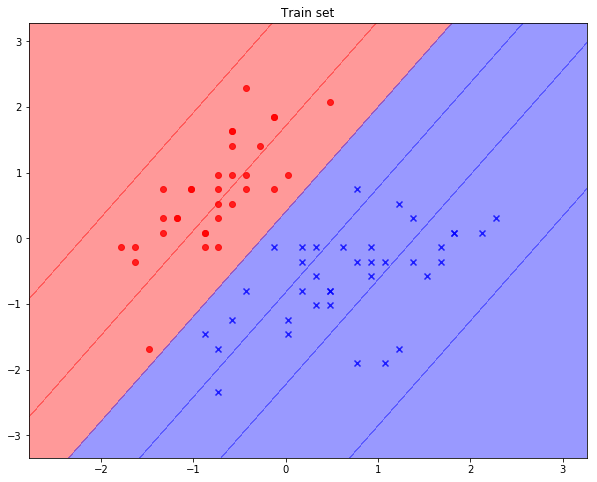

In [67]:
plot_decision_regions(X_train[:, 1:], y_train, theta[1:3])
plt.title('Train set')
plt.show()

## 多分类方法

> 相当于用了后面整个150组的数据进行多分类问题的训练与测试，因为正好有三个标签

In [73]:
def get_classifier(X_train, y_train, num_epoch=1000, alpha=0.01):
    theta = np.zeros((X_train.shape[1]))
    for epoch in range(num_epoch):
    # forward pass
      logits = np.dot(X_train, theta)
    h = 1 / (1 + np.exp(-logits))
    cross_entropy_loss = (-y_train * np.log(h) - (1 - y_train) * np.log(1 - h)).mean()

    # backward pass
    gradient = np.dot((h - y_train), X_train) / y.size
    theta = theta - alpha * gradient
    return theta

## 笔记

- python中的`DataFrame`的索引从0开始

## 相关函数 

In [14]:
# show_data_in_2d
def show_data_in_2d(X, y, title='dataset distribution of sepal length and sepal width',
                   xlabel='Sepal length', ylabel='Sepal width',
                   xidc=0, yidc=1):
    x_min, x_max = X[:, xidc].min() - .5, X[:, xidc].max() + .5
    y_min, y_max = X[:, yidc].min() - .5, X[:, yidc].max() + .5

    plt.figure(figsize=(10, 8))
    plt.title(title)

    # Plot the training points
    plt.scatter(X[:, xidc], X[:, yidc], c=y, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [66]:
# plot_decision_regions
        
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, theta, resolution=0.02):

    plt.figure(figsize=(10, 8))
    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v', '*', "+")
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'yellow','k')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = 1 / (1 + np.exp(-np.dot((np.array([xx1.ravel(), xx2.ravel()]).T), theta)))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

- 别人参考


```python
def plot_decision_regions(X, y, classifier, resolution=0.02):    
    marker = ('s', 'x', 'o', 'v')    
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
    cmap = ListedColormap(colors[:len(np.unique(y))])    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max()    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max()    
    #将x1、x2最大最小值通过arange函数得到的向量，扩展成两个二维矩阵    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))    
    #预测    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #ravel还原成单维向量    
    #绘制    
    Z= Z.reshape(xx1.shape) #将Z转换成与xx1一样的二维数组    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) #在两组分类结果中间画分割线-->必须线性可分    
    plt.xlim(xx1.min(), xx1.max())    
    plt.ylim(xx2.min(), xx2.max())    
    for idx, cl in enumerate(np.unique(y)):        
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=marker[idx], label=cl)
```